In [3]:
import pandas as pd
import xarray as xr
import glob
import os
import netCDF4
import scipy
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings

import random

import cartopy as cart
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs

from datetime import datetime

from matplotlib.patches import Rectangle

In [4]:
#Choose region #BALTIC or #NORTHSEA
region = 'NORTHSEA'

#Choose Data Location
location = 'cmems'

#Choose year to consider
year_of_choice = 2004

# Choose how larger the dataset should be w.r.t. the prediction zone (in degrees of latitude and longitude)
enlarge_dataset = 2.5

if region in {'BALTIC'} :
    max_lat = 66.0
    min_lat = 53.0
    max_lon = 31.0
    min_lon = 9.0
    
    max_lat_large = 66.0 + enlarge_dataset
    min_lat_large = 53.0 - enlarge_dataset
    max_lon_large = 31.0 + enlarge_dataset
    min_lon_large = 9.0  - enlarge_dataset    
     
    
    #Name of the dataset containing altimetry observations
    altimetry_dataset = "/DGFI8/H/work_marcello/machine_learning_altimetry/"

elif region in {'NORTHSEA'} :
    
    max_lat = 61.0
    min_lat = 50.0
    max_lon = 12.2
    min_lon = -4.0
    
    max_lat_large = 61.0 + enlarge_dataset
    min_lat_large = 50.0 - enlarge_dataset
    max_lon_large = 12.2 + enlarge_dataset
    min_lon_large = -4.0  - enlarge_dataset      
    
    
    #Name of the dataset containing altimetry observations
    altimetry_dataset = "/DGFI8/H/work_marcello/machine_learning_altimetry/"    


In [5]:
##LOAD

if region in {'BALTIC'} :
    if location in {'cmems'} :
        X = pd.read_csv(altimetry_dataset+r'X_BALTIC_dataframe_for_RF.csv',index_col=[0])
        y = pd.read_csv(altimetry_dataset+r'y_BALTIC_dataframe_for_RF.csv',index_col=[0])

        
    elif location in {'balticplus'} :
        X = pd.read_csv(altimetry_dataset+r'X_BALTIC_dataframe_for_RF_balticplus.csv',index_col=[0])
        y = pd.read_csv(altimetry_dataset+r'y_BALTIC_dataframe_for_RF_balticplus.csv',index_col=[0])


elif region in {'NORTHSEA'} :
    X = pd.read_csv(altimetry_dataset+r'X_NORTHSEA_dataframe_for_RF.csv',index_col=[0])
    y = pd.read_csv(altimetry_dataset+r'y_NORTHSEA_dataframe_for_RF.csv',index_col=[0])

In [41]:

Xone = X.loc[X['month'] == 1]
#Xone

#Xone.hist(column="z_k1", figsize=(8,8), xlabelsize=20, ylabelsize=20,xrot=45, bins=50, color='orange')


Xtwo = X.loc[X['month'] == 7]

#Xtwo.hist(column="z_k1", figsize=(8,8), xlabelsize=20, ylabelsize=20,xrot=45, bins=50, color='orange')


X_clust_one = X.loc[X['cluster'] == 1]
X_clust_two = X.loc[X['cluster'] == 2]


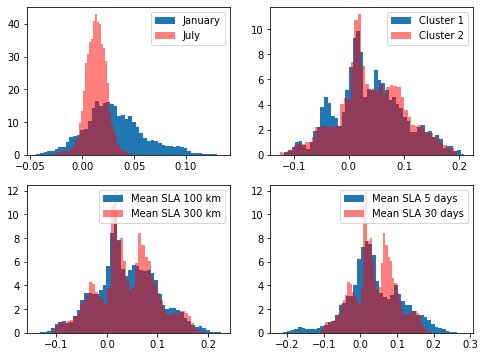

In [55]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(221)
_ = ax.hist(Xone.z_k1.values,bins=50, density=True,label='January')
_ = ax.hist(Xtwo.z_k1.values, color='red', alpha=.5,bins=50, density=True,label='July')
plt.legend()

ax2 = fig.add_subplot(222)
_ = ax2.hist(X_clust_one.z_k1.values,bins=50, density=True,label='Geo Cluster 1')
_ = ax2.hist(X_clust_two.z_k1.values, color='red', alpha=.5,bins=50, density=True, label='Geo Cluster 2')
plt.legend()

ax3 = fig.add_subplot(223)
_ = ax3.hist(X.z_k1.values,bins=50, density=True,label='Mean SLA 100 km')
_ = ax3.hist(X.z_k3.values, color='red', alpha=.5,bins=50, density=True,label='Mean SLA 300 km')
#_ = ax3.hist(X.z_tilde_k3.values, color='green', alpha=.5,bins=50, density=True,label='July')
plt.legend()

ax3 = fig.add_subplot(224)
_ = ax3.hist(X.z_u1.values,bins=50, density=True,label='Mean SLA 5 days')
_ = ax3.hist(X.z_u3.values, color='red', alpha=.5,bins=50, density=True,label='Mean SLA 30 days')
#_ = ax3.hist(X.z_tilde_k3.values, color='green', alpha=.5,bins=50, density=True,label='July')
plt.legend()

# ax1 = ax.twinx()
# x.plot(kind='kde', ax=ax1)
# y.plot(kind='kde', ax=ax1, color='red')